In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wget  
import os.path as path
from tqdm import tqdm

In [2]:
file='punto7_Data.csv'
url='https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists(file):
    Path_=wget.download(url,file)
    print('File loaded')
else:
    Path_=file

data=np.loadtxt(Path_,dtype=float,delimiter=",",skiprows=1)
x=data[:,0]
y=data[:,1]

In [3]:
def Modelo(x,p):
    return p[0]/(p[1]+np.exp(-p[2]*x))

def Metrica(p,x,y):
    return np.sum((y-Modelo(x,p))**2)

In [4]:
def Gradiente(p,x,h=1e-6):
    dim=len(p)
    J=np.zeros(dim)
    for j in range(dim):
        h_=np.zeros(dim)
        h_[j]=h
        J[j]=(Modelo(x,p+h_)-Modelo(x,p-h_))/(2*h)
    return J

In [5]:
def GetSolve(p,x,y,Modelo=Modelo,lr=5e-4,epochs=int(1e4),error=1e-2):
    d=1
    it=0
    while d > error and it < epochs:
        CurrentMe = Metrica(p,x,y)
        Sum=0
        for i in range(len(y)):
            Sum += (y[i]-Modelo(x[i],p))*Gradiente(p,x[i])
        p=p-lr*(-2)*Sum
        NewMe=Metrica(p,x,y)        
        d=np.abs(CurrentMe-NewMe)/NewMe
        d=np.sqrt(NewMe/len(y)) 
        it+=1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
    return p,it


xsol,it=GetSolve(np.array([1.,1.,1.]),x,y)
print(xsol)

[4.15951336 0.92110979 2.84500773]


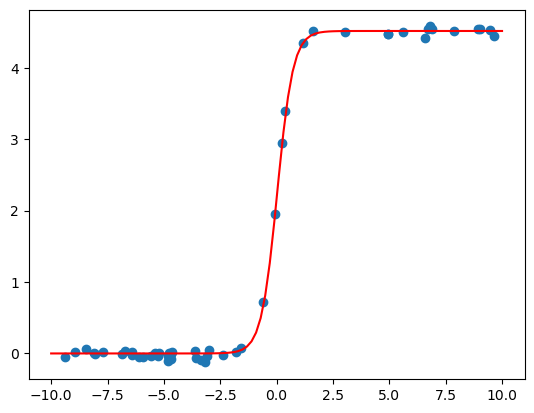

In [6]:
X=np.linspace(-10,10,100)
plt.figure()
plt.scatter(x,y)
plt.plot(X,Modelo(X,xsol),color="r")
plt.show()